# Segmentation Notebook
## Imports and initial function setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage as skimage
from sklearn.cluster import KMeans, AgglomerativeClustering

from PIL import Image

In [2]:
def display_images_side_by_side(img1, img2, title):
    fig, ax = plt.subplots(1, 2)
    
    # Display img1
    ax[0].imshow(img1)
    # ax[0].axis('off')  # No axes for img1
    
    # Display img2
    ax[1].imshow(img2)
    # ax[1].axis('off')  # No axes for img2
    
    # Set the title for the figure
    plt.suptitle(title)
    
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [3]:
def segment_only(img, mask, seg=1, replace=[0,0,0]):
    segment = np.zeros(img.shape).astype('uint8')
    for i in np.ndindex(img.shape[:2]):
        if mask[i] == seg:
            segment[i] = img[i]

    return segment

In [4]:
def plot_segments(original, mask, segments):
    # Create a figure and axes
    fig, axs = plt.subplots(2, 4, figsize=(12, 12))

    #select the six largest superpixels
    six_largest = np.argsort(np.unique(mask, return_counts=True)[1])[::-1][:6]
    selected_segments = [segments[idx] for idx in six_largest]
    
    axs[0,0].imshow(original)

    axs[0,1].imshow(mask)

    axs[0,2].imshow(selected_segments[0])
    axs[0,3].imshow(selected_segments[1])
    axs[1,0].imshow(selected_segments[2])
    axs[1,1].imshow(selected_segments[3])
    axs[1,2].imshow(selected_segments[4])
    axs[1,3].imshow(selected_segments[5])

    for x in range(2):
        for y in range(4):
            axs[x][y].axis('off')

    plt.savefig('./img/PoggoRoggo1.jpg')
    plt.show()

In [5]:
#load an image into a numpy array
img = np.array(Image.open('./img/PoggoRoggo.jpg'))

## Slic Segmentation (K-means based)

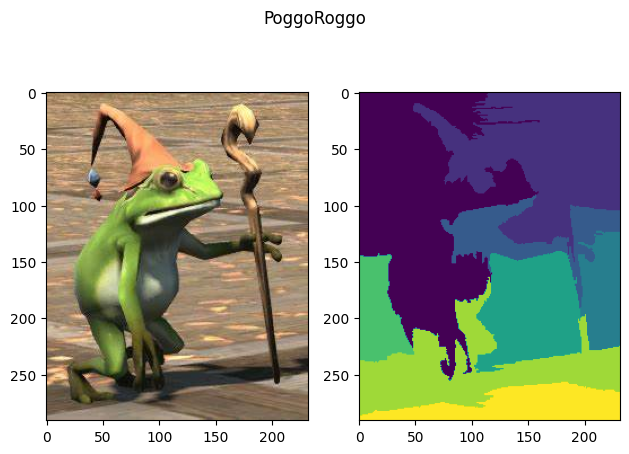

In [6]:
#segmentation example SLIC (K-Means-based)
mask = skimage.segmentation.slic(np.array(img), n_segments=10)

display_images_side_by_side(img, mask, 'PoggoRoggo')

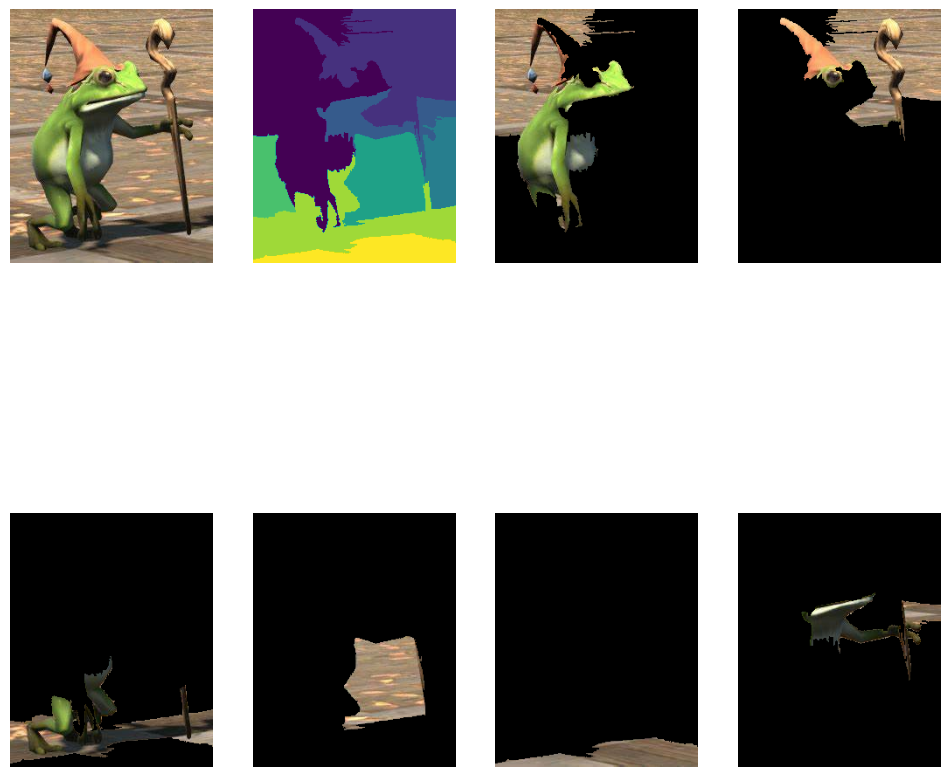

In [7]:
#plotting segments individually
plot_segments(img, mask, [segment_only(img, mask, seg=i+1) for i in range(10)])